In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# work_year: The year the salary was paid.
# experience_level: The experience level in the job during the year
# employment_type: The type of employment for the role
# job_title: The role worked in during the year.
# salary: The total gross salary amount paid.
# salary_currency: The currency of the salary paid as an ISO 4217 currency code.
# salaryinusd : The salary in USD
# employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
# remote_ratio: The overall amount of work done remotely
# company_location : The country of the employer's main office or contracting branch
# company_size : The median number of people that worked for the company during the year 

In [10]:
df1 = pd.read_csv('salaries_ds.csv')
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
df1.shape    # rows=3755 , cols=11

(3755, 11)

##  Data preprocessing

In [12]:
df1.isnull().sum()    #handling null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df1.duplicated().sum()      #handling duplicates

1171

In [14]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [15]:
df1.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [16]:
cat_cols = df1.dtypes[df1.dtypes=='object'].index
print(cat_cols)

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [17]:
for i in cat_cols:
    print('Feature:  ',i)
    print(df1[i].value_counts())
    print('*'*30)

Feature:   experience_level
SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64
******************************
Feature:   employment_type
FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
******************************
Feature:   job_title
Data Engineer                 598
Data Scientist                538
Data Analyst                  396
Machine Learning Engineer     206
Analytics Engineer             91
                             ... 
Staff Data Analyst              1
Manager Data Management         1
Data Management Specialist      1
Power BI Developer              1
Data Science Tech Lead          1
Name: job_title, Length: 93, dtype: int64
******************************
Feature:   salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
JPY       3
HUF       3
DKK       3
THB       2
MXN       1
ILS       1
CLP       1
HKD       1

In [18]:
print(cat_cols)

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [19]:
df1.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Encoding the categorical coloumns

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb = LabelEncoder()
for i in cat_cols:
    df1[i] = lb.fit_transform(df1[i])

In [22]:
df1.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [23]:
df1.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Selecting x (independent variable) and y (dependent variable)

In [24]:
## salary - target variable = y

x1 = df1.drop(['salary'],axis=1)
y1 = df1['salary']
print(x1.shape)
print(y1.shape)
print(type(x1))
print(type(y1))

(2584, 10)
(2584,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [25]:
y1.head()

0     80000
1     30000
2     25500
3    175000
4    120000
Name: salary, dtype: int64

## Splitting of data into the train and test data 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
print(x1.shape)
print(0.30*2584)

(2584, 10)
775.1999999999999


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1808, 10)
(776, 10)
(1808,)
(776,)


## applying the linear regression 

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [31]:
print('Train Score',m1.score(x_train,y_train))      
print('Test Score',m1.score(x_test,y_test))         

Train Score 0.028799065346780006
Test Score -0.010445111233698734


In [32]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[ 355030.25964522   85027.52514294  198296.07953581  109310.4833428
  181001.46621734  630763.2712796   125942.93319446  172783.74477714
  102357.54773986  214207.63286656   77923.78552505  503613.78571042
  134127.64698103  119124.69088373  451828.903584    177491.01658553
  223369.33382499  246470.20419198  249349.46158612  161791.38123688
  106298.63340586   45830.82917133  452732.41749173  164410.59631833
  130795.60938928  149279.00216612  376799.21319273   72599.64283353
  130315.0898827    47593.5293127   221728.59365168   37737.86373177
  170833.02833658  330881.13426036  112724.50976777  633625.83434471
  109887.17258218   97536.04831469  215150.00049564  315279.43561745
  249360.78840402  128688.46149716  161075.69055551  153408.32845315
  417120.68830141  191441.47059479  190463.80872446  252100.02855241
  463551.79464006  161838.44139212  339941.0393163   236528.71145701
  660364.76521358  336894.1146695   149773.3718667   174128.52463922
  221971.87252149   85780.40571061 

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [36]:
eval_model(y_test,ypred_m1)

MAE 184094.16107451663
MSE 297155032632.7359
RMSE 545119.2829397396
R2_Score -0.010445111233698734


## Logistic Regression

In [37]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [38]:
df1.isnull().sum()    # handling null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [39]:
df1.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [40]:
print(df1.shape)

(2584, 11)


#### selecting x and y

In [41]:
x1 = df1.drop(['salary'],axis=1)
y1 = df1['salary']
print(x1.shape)
print(y1.shape)
print(type(x1))
print(type(y1))

(2584, 10)
(2584,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### splitting the data into train and test data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
print(x1.shape)
print(0.30*2584)

(2584, 10)
775.1999999999999


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1808, 10)
(776, 10)
(1808,)
(776,)


In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
print('Train Score', model.score(x_train,y_train)) # Train Accuracy
print('Test Score', model.score(x_test,y_test))  # Test Accuracy

Train Score 0.07300884955752213
Test Score 0.05412371134020619


In [50]:
ypred_model = model.predict(x_test)
print(ypred_model)

[100000 100000 200000 100000 100000 200000 150000 100000 200000 100000
 200000 150000 100000 150000 100000 100000 100000 100000 200000 100000
 100000 200000 100000 100000 200000 100000 100000 150000 100000 150000
 200000 100000 100000 150000 100000 100000 100000 100000 150000 100000
 200000 100000 100000 100000 100000 150000 150000 150000 100000 200000
 100000 150000 150000 100000 150000 100000 150000 150000 150000 150000
 100000 150000 100000 100000 100000 200000 100000 100000 100000 100000
 100000 150000 150000 150000 150000 200000 150000 100000 150000 100000
 200000 150000 100000 150000 200000 100000 100000 200000 200000 100000
 150000 100000 150000 150000 100000 100000 100000 100000 150000 100000
 150000 200000 100000 100000 200000 100000 100000 100000 100000 150000
 150000 100000 100000 200000 100000 200000 100000 100000 100000 200000
 100000 100000 100000 100000 200000 100000 150000 200000 100000 150000
 150000 150000 200000 100000 200000 200000 150000 150000 100000 150000
 15000

## KNN Classification

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [53]:
df1.shape

(2584, 11)

In [54]:
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [55]:
df1.duplicated().sum()

0

In [56]:
df1['salary_currency'].value_counts()

19    2107
7      200
8      144
12      59
2       25
0        9
16       6
1        6
15       5
3        4
10       3
18       3
6        3
13       3
17       2
14       1
5        1
4        1
9        1
11       1
Name: salary_currency, dtype: int64

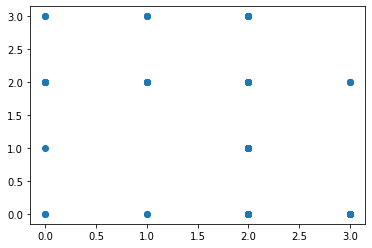

In [57]:
plt.scatter(df1['employment_type'],df1['experience_level'])
plt.show()

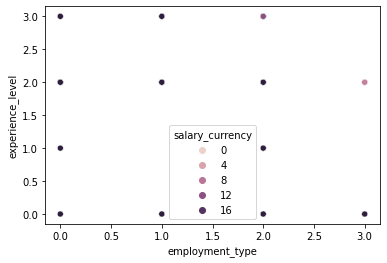

In [58]:
sns.scatterplot(x=df1['employment_type'],y=df1['experience_level'],hue=df1['salary_currency'])
plt.show()

####  selecting x and y

In [59]:
x1 = df1.drop(['salary'],axis=1)
y1 = df1['salary']
print(x1.shape)
print(y1.shape)

(2584, 10)
(2584,)


####  splitting the data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1808, 10)
(776, 10)
(1808,)
(776,)


#### applying KNN classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
m1 = KNeighborsClassifier(n_neighbors=30)
m1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [64]:
print('Train Score',m1.score(x_train,y_train))
print('Test Score',m1.score(x_test,y_test))

Train Score 0.3821902654867257
Test Score 0.3595360824742268


In [65]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[ 48000  90000 225000 130000 100000 220000 190000 130000 250000  30000
 230000 190000  95000 180000 125000  95000 100000  90000 300000 135000
  55000 215000  20000  12000 300000 100000 125000 150000 115000 155000
 200000 130000 115000 185000  30000  75000  40000  90000 185000  50000
 260000 110000  70000 128000  90000 170000 180000 190000 125000 200000
 100000 150000 180000  12000 180000  40000 140000 145000 145000 150000
  40000 190000  75000  20000 110000 200000 100000  60000  60000  60000
  95000 140000 165000 175000 192000 220000 170000  75000 136000  95000
 250000 175000 130000 175000 250000 100000  65000 210000 250000  60000
 185000  75000 170000 160000  12000 110000  50000 100000 150000  70000
 190000 230000 115000  65000 250000  50000  70000 105000  55000 192000
 145000  80000  75000 225000 128000 210000 130000  60000 135000 240000
 100000  40000 135000  50000 205000 105000 193900 205000  75000 170000
 140000 155000 230000 122000 250000 200000 155000 155000  80000 145000
 15000

#### confusion matrix and classification

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[0 0 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        9272       0.00      0.00      0.00         1
       10000       0.00      0.00      0.00         2
       12000       0.08      1.00      0.14         1
       19000       0.00      0.00      0.00         1
       20000       0.21      1.00      0.35         3
       21000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00         2
       25000       0.00      0.00      0.00         1
       26000       0.00      0.00      0.00         1
       28500       0.00      0.00      0.00         1
       30000       0.27      1.00      0.43         3
       31000       0.00      0.00      0.00         1
       33000       0.00      0.00      0.00         3
       34000   

C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-p

## SVM classifier with linear and RBF(radial basis function) kernal

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [70]:
df1.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [71]:
a = df1['salary_currency'].value_counts()
a

19    2107
7      200
8      144
12      59
2       25
0        9
16       6
1        6
15       5
3        4
10       3
18       3
6        3
13       3
17       2
14       1
5        1
4        1
9        1
11       1
Name: salary_currency, dtype: int64

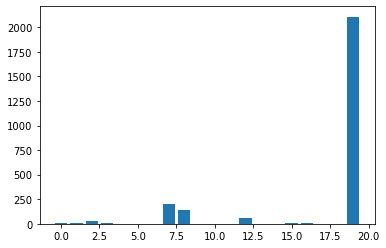

In [72]:
plt.bar(a.index,a.values)
plt.show()

In [73]:
### select x and y

x =  df1.drop('salary_currency',axis=1)
y = df1['salary_currency']
print(x.shape)
print(y.shape)

(2584, 10)
(2584,)


In [74]:
### splitting of data 

from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1938, 10)
(646, 10)
(1938,)
(646,)


#### Linear kernel

In [76]:
from sklearn.svm import SVC

In [77]:
m1 = SVC(kernel='linear',C=1)
m1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [78]:
print('Train Score',m1.score(x_train,y_train))  
print('Test Score',m1.score(x_test,y_test))    

Train Score 0.9989680082559339
Test Score 0.9891640866873065


In [80]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[ 7 19 19 19 19 19 19  8 19  7 19 19 19 19 19 19  8 19 19 19  8 19 12 19
 19  2 19 19 19 19 19 19 19 19 19 19 12 19 19 19 19 19  7 19 19 19 19 19
  2 19 19 19 19 19 19  7 19 19 19 19 19 19 19 19 19 19 19  8  8  8 19 19
 19 19 19 19 19  8 19 19 19 19 19 19 19  8 19 19 19 19 19 19 19 19  1 19
  8 19 19  7 19 19 19 19 19  8 19 19 12 19 19 19 19 19 19 19 19 19 19 19
 19  7 19  7 19 19 19 19  8 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
  8 19 19  8 19 19  7 19 19 19 19 19 19 19 19 19  7 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19  7 19 19 19 19  7 19 19 19 19  2  7
 19 19 19 19  7 19 19 19  7  1 19 19 19  7 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19  7  2 19 19 19 19 19 19 19 19  8  7 19 19
 19 19 19 19 12  7 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19  0 19 12  2 19 19 19 19 19 19 19 19  8 19 19 19
 19 19 19 19 19 19 19 19 19 19 19  8 19  7 19 19  7 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 12 19 19 19  7 19

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [83]:
eval_model(y_test,ypred_m1)

[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0  39   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  1   0   1   0   0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 536]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
          

C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-p

#### RBF kernel

In [84]:
m1 = SVC(kernel='rbf')
m1.fit(x_train,y_train)

SVC()

In [85]:
print('Train Score',m1.score(x_train,y_train))  
print('Test Score',m1.score(x_test,y_test))    

Train Score 0.8353973168214655
Test Score 0.8513931888544891


In [86]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 12 19
 19 19 19 19 19 19 19 19 19 19 19 19 12 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 12 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 12 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 12 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 12 19 19 19 19 19

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [89]:
eval_model(y_test,ypred_m1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  39]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  14   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 536]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1
           6 

C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree classifier

In [90]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [91]:
df1['employment_type'].value_counts()

2    2547
3      17
0      10
1      10
Name: employment_type, dtype: int64

In [92]:
# select x and y
x1 = df1.drop('employment_type',axis=1)
y1 = df1['employment_type']
print(x1.shape)
print(y1.shape)

(2584, 10)
(2584,)


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1938, 10)
(646, 10)
(1938,)
(646,)


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
m1 = DecisionTreeClassifier(criterion='entropy',min_samples_split=10,max_depth=7)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10)

In [97]:
print('Train Score',m1.score(x_train,y_train))  # Train Acc
print('Test Score',m1.score(x_test,y_test))     # Test Acc

Train Score 0.9938080495356038
Test Score 0.9721362229102167


In [98]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))
    
eval_model(y_test,ypred_m1)    

[[  0   0   3   0]
 [  0   0   4   0]
 [  4   1 627   1]
 [  0   0   5   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.98      0.99      0.99       633
           3       0.50      0.17      0.25         6

    accuracy                           0.97       646
   macro avg       0.37      0.29      0.31       646
weighted avg       0.97      0.97      0.97       646



In [100]:
fn = x_train.columns
cn = ['0','1','2','3']
print(fn)
print(cn)

Index(['work_year', 'experience_level', 'job_title', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
['0', '1', '2', '3']


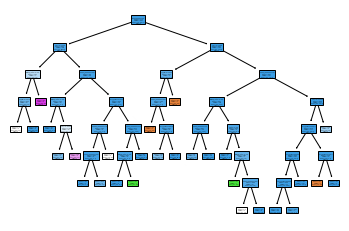

In [101]:
from sklearn.tree import plot_tree
plot_tree(m1,feature_names=fn,class_names=cn,filled=True)
plt.show()

##  Random Forest Classifier

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [104]:
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [105]:
df1.duplicated().sum()

0

In [106]:
df1.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [108]:
df1['salary'].value_counts()

100000    70
120000    59
150000    58
200000    48
80000     46
          ..
182200     1
256000     1
83376      1
186300     1
147800     1
Name: salary, Length: 815, dtype: int64

In [109]:
### selecting x and y

x1 = df1.drop('salary',axis=1)
y1 = df1['salary']
print(type(x1))
print(type(y1))
print(x1.shape)
print(y1.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2584, 10)
(2584,)


In [110]:
#### splitting of data

from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1938, 10)
(646, 10)
(1938,)
(646,)


In [115]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [116]:
def gen_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [118]:
### decision tree

dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=15)
gen_model(dt1,x_train,x_test,y_train,y_test)

Train Score 0.6006191950464397
Test Score 0.47832817337461303
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        8000       0.00      0.00      0.00         0
        9272       0.00      0.00      0.00         1
       10000       0.00      0.00      0.00         2
       12000       0.25      1.00      0.40         1
       13000       0.00      0.00      0.00         0
       15000       0.00      0.00      0.00         0
       19000       0.00      0.00      0.00         1
       20000       0.60      1.00      0.75         3
       21000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       23000       0.00      0.00      0.00         0
       24000       0.67      1.00      0.80         2
       25000       0.00      0.00      0.00         1
       28500       0.00      0.00      0.00         1
       

C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-p

In [120]:
#### random forest


rf1 = RandomForestClassifier(n_estimators=70,criterion='entropy', max_depth=8, min_samples_split=15)
gen_model(rf1,x_train,x_test,y_train,y_test)

Train Score 0.5056759545923633
Test Score 0.19195046439628483
[[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        9272       0.00      0.00      0.00         1
       10000       0.50      0.50      0.50         2
       12000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         1
       20000       0.50      0.67      0.57         3
       21000       0.00      0.00      0.00         1
       22000       0.00      0.00      0.00         1
       24000       0.00      0.00      0.00         2
       25000       0.00      0.00      0.00         1
       28500       0.00      0.00      0.00         1
       30000       0.12      0.50      0.20         2
       31000       0.00      0.00      0.00         1
       32400       0.00      0.00      0.00         0
       33000       0.00      0.00      0.00         3
       

C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kavitha Ooha\Anaconda3\lib\site-p